# Package

In [78]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

# Data Generate

In [82]:
x_data = tf.random.normal(shape = (1000, ), dtype = tf.float32) # Constant
y_data = 3 * x_data + 1 # Constant

w = tf.Variable(-1.)
b = tf.Variable(-1.)

In [80]:
print(type(x_data))

<class 'tensorflow.python.framework.ops.EagerTensor'>


# Hyperparamters

In [74]:
LR = 0.01
EPOCHS = 10

w_trace = []; b_trace = []

# Train

In [75]:
for i in tqdm(range(EPOCHS)):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            prediction = w * x + b
            loss = (prediction - y) ** 2 # MSE
        gradients = tape.gradient(loss, [w, b])

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())

        w = tf.Variable(w - LR * gradients[0])
        b = tf.Variable(b - LR * gradients[1])

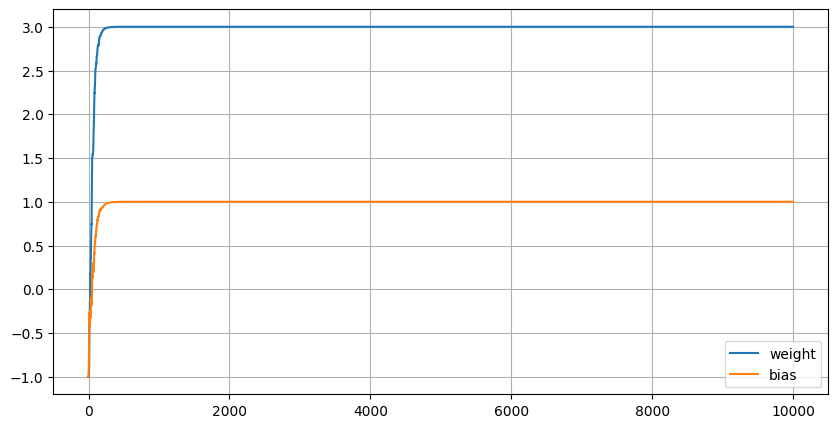

In [77]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(w_trace, label = "weight")
ax.plot(b_trace, label = "bias")

ax.tick_params(labelsize = 10)
ax.legend(fontsize = 10)

ax.grid()